# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 7358 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (   0 of 7358) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 7358) |                       | Elapsed Time: 0:00:25 ETA: 5:45:09

  0% (  24 of 7358) |                       | Elapsed Time: 0:00:25 ETA: 2:10:15

  0% (  40 of 7358) |                       | Elapsed Time: 0:00:25 ETA: 1:18:38

  0% (  57 of 7358) |                       | Elapsed Time: 0:00:26 ETA: 0:55:30

  0% (  73 of 7358) |                       | Elapsed Time: 0:00:26 ETA: 0:01:38

  1% (  92 of 7358) |                       | Elapsed Time: 0:00:26 ETA: 0:01:36

  1% ( 107 of 7358) |                       | Elapsed Time: 0:00:26 ETA: 0:01:38

  1% ( 121 of 7358) |                       | Elapsed Time: 0:00:26 ETA: 0:01:40

  1% ( 137 of 7358) |                       | Elapsed Time: 0:00:27 ETA: 0:01:41

  2% ( 153 of 7358) |                       | Elapsed Time: 0:00:27 ETA: 0:01:39

  2% ( 169 of 7358) |                       | Elapsed Time: 0:00:27 ETA: 0:01:39

  2% ( 192 of 7358) |                       | Elapsed Time: 0:00:27 ETA: 0:01:35

  2% ( 208 of 7358) |                       | Elapsed Time: 0:00:28 ETA: 0:01:34

  3% ( 224 of 7358) |                       | Elapsed Time: 0:00:28 ETA: 0:01:33

  3% ( 240 of 7358) |                       | Elapsed Time: 0:00:28 ETA: 0:01:33

  3% ( 256 of 7358) |                       | Elapsed Time: 0:00:28 ETA: 0:01:32

  3% ( 276 of 7358) |                       | Elapsed Time: 0:00:28 ETA: 0:01:32

  3% ( 292 of 7358) |                       | Elapsed Time: 0:00:29 ETA: 0:01:31

  4% ( 308 of 7358) |                       | Elapsed Time: 0:00:29 ETA: 0:01:31

  4% ( 324 of 7358) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:31

  4% ( 340 of 7358) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:31

  4% ( 356 of 7358) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:30

  5% ( 376 of 7358) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:30

  5% ( 392 of 7358) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:30

  5% ( 408 of 7358) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:30

  5% ( 424 of 7358) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:30

  5% ( 440 of 7358) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:29

  6% ( 460 of 7358) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:30

  6% ( 476 of 7358) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:30

  6% ( 492 of 7358) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:30

  6% ( 508 of 7358) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:31

  7% ( 523 of 7358) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:33

  7% ( 538 of 7358) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:33

  7% ( 552 of 7358) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:34

  7% ( 568 of 7358) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:35

  7% ( 584 of 7358) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:33

  8% ( 600 of 7358) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:32

  8% ( 615 of 7358) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:32

  8% ( 631 of 7358) |#                      | Elapsed Time: 0:00:33 ETA: 0:01:31

  8% ( 652 of 7358) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:31

  9% ( 667 of 7358) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:32

  9% ( 681 of 7358) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:33

  9% ( 698 of 7358) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:31

  9% ( 713 of 7358) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:32

  9% ( 729 of 7358) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:32

 10% ( 744 of 7358) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:31

 10% ( 762 of 7358) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:26

 10% ( 780 of 7358) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:25

 10% ( 795 of 7358) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:26

 11% ( 811 of 7358) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:26

 11% ( 828 of 7358) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:28

 11% ( 844 of 7358) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:29

 11% ( 860 of 7358) |##                     | Elapsed Time: 0:00:36 ETA: 0:01:28

 11% ( 876 of 7358) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:27

 12% ( 892 of 7358) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:26

 12% ( 909 of 7358) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:25

 12% ( 929 of 7358) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:24

 12% ( 947 of 7358) |##                     | Elapsed Time: 0:00:37 ETA: 0:01:22

 13% ( 964 of 7358) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:21

 13% ( 978 of 7358) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:22

 13% ( 992 of 7358) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:25

 13% (1012 of 7358) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:27

 13% (1028 of 7358) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:29

 14% (1044 of 7358) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:28

 14% (1061 of 7358) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:24

 14% (1078 of 7358) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:22

 14% (1094 of 7358) |###                    | Elapsed Time: 0:00:39 ETA: 0:01:22

 15% (1112 of 7358) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:21

 15% (1128 of 7358) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:21

 15% (1144 of 7358) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:23

 15% (1159 of 7358) |###                    | Elapsed Time: 0:00:40 ETA: 0:01:23

 15% (1175 of 7358) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:24

 16% (1196 of 7358) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:25

 16% (1213 of 7358) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:23

 16% (1230 of 7358) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:21

 16% (1246 of 7358) |###                    | Elapsed Time: 0:00:41 ETA: 0:01:20

 17% (1262 of 7358) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:17

 17% (1278 of 7358) |###                    | Elapsed Time: 0:00:42 ETA: 0:01:17

 17% (1296 of 7358) |####                   | Elapsed Time: 0:00:42 ETA: 0:01:19

 17% (1312 of 7358) |####                   | Elapsed Time: 0:00:42 ETA: 0:01:20

 18% (1328 of 7358) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:20

 18% (1344 of 7358) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:19

 18% (1360 of 7358) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:18

 18% (1380 of 7358) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:18

 18% (1395 of 7358) |####                   | Elapsed Time: 0:00:43 ETA: 0:01:19

 19% (1412 of 7358) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:18

 19% (1428 of 7358) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:18

 19% (1445 of 7358) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:17

 19% (1461 of 7358) |####                   | Elapsed Time: 0:00:44 ETA: 0:01:17

 20% (1480 of 7358) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:16

 20% (1497 of 7358) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:15

 20% (1513 of 7358) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:15

 20% (1528 of 7358) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:15

 20% (1544 of 7358) |####                   | Elapsed Time: 0:00:45 ETA: 0:01:16

 21% (1564 of 7358) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:15

 21% (1581 of 7358) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:14

 21% (1597 of 7358) |####                   | Elapsed Time: 0:00:46 ETA: 0:01:13

 21% (1613 of 7358) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:14

 22% (1627 of 7358) |#####                  | Elapsed Time: 0:00:46 ETA: 0:01:16

 22% (1643 of 7358) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:17

 22% (1652 of 7358) |#####                  | Elapsed Time: 0:00:47 ETA: 0:01:17

 22% (1664 of 7358) |#####                  | Elapsed Time: 0:00:48 ETA: 0:02:27

 22% (1680 of 7358) |#####                  | Elapsed Time: 0:00:48 ETA: 0:02:25

 23% (1698 of 7358) |#####                  | Elapsed Time: 0:00:48 ETA: 0:02:17

 23% (1715 of 7358) |#####                  | Elapsed Time: 0:00:48 ETA: 0:02:16

 23% (1732 of 7358) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:12

 23% (1748 of 7358) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:12

 23% (1765 of 7358) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:12

 24% (1782 of 7358) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:11

 24% (1798 of 7358) |#####                  | Elapsed Time: 0:00:49 ETA: 0:01:11

 24% (1814 of 7358) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:11

 24% (1829 of 7358) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:11

 25% (1847 of 7358) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:14

 25% (1863 of 7358) |#####                  | Elapsed Time: 0:00:50 ETA: 0:01:14

 25% (1876 of 7358) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:17

 25% (1889 of 7358) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:20

 25% (1903 of 7358) |#####                  | Elapsed Time: 0:00:51 ETA: 0:01:23

 26% (1920 of 7358) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:19

 26% (1939 of 7358) |######                 | Elapsed Time: 0:00:51 ETA: 0:01:16

 26% (1955 of 7358) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:15

 26% (1970 of 7358) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:12

 26% (1986 of 7358) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:11

 27% (2002 of 7358) |######                 | Elapsed Time: 0:00:52 ETA: 0:01:13

 27% (2024 of 7358) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:12

 27% (2041 of 7358) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:10

 27% (2058 of 7358) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:09

 28% (2075 of 7358) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:08

 28% (2091 of 7358) |######                 | Elapsed Time: 0:00:53 ETA: 0:01:08

 28% (2108 of 7358) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:06

 28% (2125 of 7358) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:05

 29% (2143 of 7358) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:05

 29% (2161 of 7358) |######                 | Elapsed Time: 0:00:54 ETA: 0:01:04

 29% (2177 of 7358) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:04

 29% (2192 of 7358) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:06

 30% (2208 of 7358) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:06

 30% (2226 of 7358) |######                 | Elapsed Time: 0:00:55 ETA: 0:01:06

 30% (2244 of 7358) |#######                | Elapsed Time: 0:00:55 ETA: 0:01:06

 30% (2261 of 7358) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:04

 30% (2278 of 7358) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:03

 31% (2300 of 7358) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:01

 31% (2318 of 7358) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:00

 31% (2334 of 7358) |#######                | Elapsed Time: 0:00:56 ETA: 0:01:01

 31% (2350 of 7358) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:01

 32% (2365 of 7358) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:03

 32% (2380 of 7358) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:07

 32% (2400 of 7358) |#######                | Elapsed Time: 0:00:57 ETA: 0:01:07

 32% (2415 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:08

 33% (2430 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:08

 33% (2447 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:05

 33% (2464 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:03

 33% (2484 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:01:02

 33% (2500 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:00

 34% (2516 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:00

 34% (2533 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:00

 34% (2550 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:01:00

 34% (2567 of 7358) |########               | Elapsed Time: 0:01:00 ETA: 0:01:00

 35% (2585 of 7358) |########               | Elapsed Time: 0:01:00 ETA: 0:00:59

 35% (2602 of 7358) |########               | Elapsed Time: 0:01:00 ETA: 0:00:59

 35% (2620 of 7358) |########               | Elapsed Time: 0:01:00 ETA: 0:00:58

 35% (2637 of 7358) |########               | Elapsed Time: 0:01:00 ETA: 0:00:59

 36% (2653 of 7358) |########               | Elapsed Time: 0:01:01 ETA: 0:00:59

 36% (2677 of 7358) |########               | Elapsed Time: 0:01:01 ETA: 0:00:58

 36% (2695 of 7358) |########               | Elapsed Time: 0:01:01 ETA: 0:00:58

 36% (2711 of 7358) |########               | Elapsed Time: 0:01:01 ETA: 0:00:57

 37% (2728 of 7358) |########               | Elapsed Time: 0:01:02 ETA: 0:00:57

 37% (2744 of 7358) |########               | Elapsed Time: 0:01:02 ETA: 0:00:57

 37% (2760 of 7358) |########               | Elapsed Time: 0:01:02 ETA: 0:00:57

 37% (2776 of 7358) |########               | Elapsed Time: 0:01:02 ETA: 0:00:58

 37% (2794 of 7358) |########               | Elapsed Time: 0:01:02 ETA: 0:00:57

 38% (2812 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:00:57

 38% (2830 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:00:55

 38% (2852 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:00:54

 38% (2869 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:00:53

 39% (2885 of 7358) |#########              | Elapsed Time: 0:01:03 ETA: 0:00:54

 39% (2902 of 7358) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:55

 39% (2918 of 7358) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:56

 39% (2934 of 7358) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:57

 40% (2952 of 7358) |#########              | Elapsed Time: 0:01:04 ETA: 0:00:58

 40% (2968 of 7358) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:58

 40% (2983 of 7358) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:59

 40% (2999 of 7358) |#########              | Elapsed Time: 0:01:05 ETA: 0:00:59

 40% (3014 of 7358) |#########              | Elapsed Time: 0:01:05 ETA: 0:01:00

 41% (3036 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:01:00

 41% (3052 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:58

 41% (3069 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:57

 41% (3085 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:56

 42% (3102 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:55

 42% (3117 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:55

 42% (3135 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:58

 42% (3150 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:58

 43% (3168 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:58

 43% (3185 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:58

 43% (3200 of 7358) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:56

 43% (3220 of 7358) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:53

 44% (3238 of 7358) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:52

 44% (3255 of 7358) |##########             | Elapsed Time: 0:01:08 ETA: 0:00:52

 44% (3271 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:51

 44% (3289 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:50

 45% (3312 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:51

 45% (3329 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:51

 45% (3346 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:51

 45% (3363 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:51

 45% (3379 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:51

 46% (3396 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:51

 46% (3412 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:50

 46% (3428 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:51

 46% (3444 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:50

 47% (3461 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:50

 47% (3479 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:49

 47% (3496 of 7358) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:50

 47% (3512 of 7358) |##########             | Elapsed Time: 0:01:12 ETA: 0:00:49

 47% (3528 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:50

 48% (3544 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:49

 48% (3560 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:50

 48% (3576 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:51

 48% (3596 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:50

 49% (3612 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:50

 49% (3630 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:48

 49% (3646 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:47

 49% (3664 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:46

 50% (3688 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:45

 50% (3705 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:45

 50% (3723 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:45

 50% (3740 of 7358) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:44

 51% (3756 of 7358) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:44

 51% (3771 of 7358) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:47

 51% (3786 of 7358) |###########            | Elapsed Time: 0:01:15 ETA: 0:00:49

 51% (3803 of 7358) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:49

 51% (3820 of 7358) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:49

 52% (3835 of 7358) |###########            | Elapsed Time: 0:01:16 ETA: 0:00:48

 52% (3851 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:47

 52% (3872 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:45

 52% (3889 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:45

 53% (3905 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:45

 53% (3920 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 53% (3936 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:44

 53% (3955 of 7358) |############           | Elapsed Time: 0:01:18 ETA: 0:00:44

 53% (3971 of 7358) |############           | Elapsed Time: 0:01:18 ETA: 0:00:44

 54% (3989 of 7358) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 54% (4005 of 7358) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 54% (4021 of 7358) |############           | Elapsed Time: 0:01:18 ETA: 0:00:43

 54% (4037 of 7358) |############           | Elapsed Time: 0:01:19 ETA: 0:00:43

 55% (4055 of 7358) |############           | Elapsed Time: 0:01:19 ETA: 0:00:42

 55% (4071 of 7358) |############           | Elapsed Time: 0:01:19 ETA: 0:00:43

 55% (4088 of 7358) |############           | Elapsed Time: 0:01:19 ETA: 0:00:42

 55% (4105 of 7358) |############           | Elapsed Time: 0:01:19 ETA: 0:00:41

 56% (4122 of 7358) |############           | Elapsed Time: 0:01:20 ETA: 0:00:40

 56% (4139 of 7358) |############           | Elapsed Time: 0:01:20 ETA: 0:00:41

 56% (4153 of 7358) |############           | Elapsed Time: 0:01:20 ETA: 0:00:43

 56% (4167 of 7358) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:44

 56% (4183 of 7358) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:46

 57% (4198 of 7358) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:46

 57% (4215 of 7358) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:43

 57% (4240 of 7358) |#############          | Elapsed Time: 0:01:21 ETA: 0:00:41

 57% (4256 of 7358) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:40

 58% (4272 of 7358) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:39

 58% (4289 of 7358) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:39

 58% (4305 of 7358) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:39

 58% (4323 of 7358) |#############          | Elapsed Time: 0:01:22 ETA: 0:00:39

 58% (4339 of 7358) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:39

 59% (4355 of 7358) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:38

 59% (4373 of 7358) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:37

 59% (4390 of 7358) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:37

 59% (4406 of 7358) |#############          | Elapsed Time: 0:01:23 ETA: 0:00:37

 60% (4423 of 7358) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:37

 60% (4440 of 7358) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:37

 60% (4455 of 7358) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:38

 60% (4472 of 7358) |#############          | Elapsed Time: 0:01:24 ETA: 0:00:38

 61% (4489 of 7358) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:37

 61% (4507 of 7358) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:37

 61% (4522 of 7358) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:37

 61% (4539 of 7358) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:36

 61% (4554 of 7358) |##############         | Elapsed Time: 0:01:25 ETA: 0:00:37

 62% (4571 of 7358) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:36

 62% (4589 of 7358) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 62% (4606 of 7358) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 62% (4622 of 7358) |##############         | Elapsed Time: 0:01:26 ETA: 0:00:35

 63% (4637 of 7358) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:36

 63% (4653 of 7358) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:36

 63% (4671 of 7358) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:35

 63% (4691 of 7358) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:35

 63% (4708 of 7358) |##############         | Elapsed Time: 0:01:27 ETA: 0:00:34

 64% (4725 of 7358) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:33

 64% (4743 of 7358) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:33

 64% (4759 of 7358) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:33

 64% (4775 of 7358) |##############         | Elapsed Time: 0:01:28 ETA: 0:00:33

 65% (4791 of 7358) |##############         | Elapsed Time: 0:01:29 ETA: 0:00:32

 65% (4807 of 7358) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:33

 65% (4824 of 7358) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:33

 65% (4833 of 7358) |###############        | Elapsed Time: 0:01:29 ETA: 0:00:32

 65% (4847 of 7358) |###############        | Elapsed Time: 0:01:30 ETA: 0:01:08

 66% (4862 of 7358) |###############        | Elapsed Time: 0:01:30 ETA: 0:01:08

 66% (4883 of 7358) |###############        | Elapsed Time: 0:01:31 ETA: 0:01:06

 66% (4900 of 7358) |###############        | Elapsed Time: 0:01:31 ETA: 0:01:06

 66% (4918 of 7358) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:32

 67% (4934 of 7358) |###############        | Elapsed Time: 0:01:31 ETA: 0:00:32

 67% (4950 of 7358) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:31

 67% (4967 of 7358) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:30

 67% (4982 of 7358) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:31

 67% (4998 of 7358) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:31

 68% (5014 of 7358) |###############        | Elapsed Time: 0:01:32 ETA: 0:00:31

 68% (5031 of 7358) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:30

 68% (5050 of 7358) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:29

 68% (5068 of 7358) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:28

 69% (5084 of 7358) |###############        | Elapsed Time: 0:01:33 ETA: 0:00:28

 69% (5099 of 7358) |###############        | Elapsed Time: 0:01:34 ETA: 0:00:28

 69% (5117 of 7358) |###############        | Elapsed Time: 0:01:34 ETA: 0:00:28

 69% (5134 of 7358) |################       | Elapsed Time: 0:01:34 ETA: 0:00:28

 70% (5151 of 7358) |################       | Elapsed Time: 0:01:34 ETA: 0:00:28

 70% (5167 of 7358) |################       | Elapsed Time: 0:01:34 ETA: 0:00:28

 70% (5183 of 7358) |################       | Elapsed Time: 0:01:35 ETA: 0:00:28

 70% (5200 of 7358) |################       | Elapsed Time: 0:01:35 ETA: 0:00:27

 70% (5217 of 7358) |################       | Elapsed Time: 0:01:35 ETA: 0:00:28

 71% (5232 of 7358) |################       | Elapsed Time: 0:01:35 ETA: 0:00:28

 71% (5252 of 7358) |################       | Elapsed Time: 0:01:36 ETA: 0:00:27

 71% (5268 of 7358) |################       | Elapsed Time: 0:01:36 ETA: 0:00:27

 71% (5285 of 7358) |################       | Elapsed Time: 0:01:36 ETA: 0:00:26

 72% (5302 of 7358) |################       | Elapsed Time: 0:01:36 ETA: 0:00:25

 72% (5319 of 7358) |################       | Elapsed Time: 0:01:36 ETA: 0:00:25

 72% (5335 of 7358) |################       | Elapsed Time: 0:01:37 ETA: 0:00:26

 72% (5351 of 7358) |################       | Elapsed Time: 0:01:37 ETA: 0:00:26

 72% (5368 of 7358) |################       | Elapsed Time: 0:01:37 ETA: 0:00:25

 73% (5384 of 7358) |################       | Elapsed Time: 0:01:37 ETA: 0:00:26

 73% (5400 of 7358) |################       | Elapsed Time: 0:01:37 ETA: 0:00:26

 73% (5414 of 7358) |################       | Elapsed Time: 0:01:38 ETA: 0:00:26

 73% (5435 of 7358) |################       | Elapsed Time: 0:01:38 ETA: 0:00:26

 74% (5451 of 7358) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:26

 74% (5469 of 7358) |#################      | Elapsed Time: 0:01:38 ETA: 0:00:26

 74% (5486 of 7358) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:24

 74% (5501 of 7358) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:24

 75% (5519 of 7358) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:23

 75% (5535 of 7358) |#################      | Elapsed Time: 0:01:39 ETA: 0:00:23

 75% (5553 of 7358) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:23

 75% (5570 of 7358) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:22

 75% (5586 of 7358) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:23

 76% (5602 of 7358) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:22

 76% (5619 of 7358) |#################      | Elapsed Time: 0:01:40 ETA: 0:00:22

 76% (5635 of 7358) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:23

 76% (5651 of 7358) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:22

 77% (5668 of 7358) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:22

 77% (5684 of 7358) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:21

 77% (5703 of 7358) |#################      | Elapsed Time: 0:01:41 ETA: 0:00:21

 77% (5718 of 7358) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:21

 77% (5734 of 7358) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:21

 78% (5751 of 7358) |#################      | Elapsed Time: 0:01:42 ETA: 0:00:21

 78% (5765 of 7358) |##################     | Elapsed Time: 0:01:42 ETA: 0:00:21

 78% (5779 of 7358) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:22

 78% (5795 of 7358) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:21

 78% (5811 of 7358) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:21

 79% (5828 of 7358) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:21

 79% (5846 of 7358) |##################     | Elapsed Time: 0:01:43 ETA: 0:00:19

 79% (5862 of 7358) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:18

 79% (5880 of 7358) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:18

 80% (5896 of 7358) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:18

 80% (5913 of 7358) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:18

 80% (5928 of 7358) |##################     | Elapsed Time: 0:01:44 ETA: 0:00:18

 80% (5945 of 7358) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:18

 81% (5961 of 7358) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:18

 81% (5979 of 7358) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:17

 81% (5997 of 7358) |##################     | Elapsed Time: 0:01:45 ETA: 0:00:16

 81% (6014 of 7358) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:16

 81% (6030 of 7358) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:16

 82% (6046 of 7358) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:16

 82% (6071 of 7358) |##################     | Elapsed Time: 0:01:46 ETA: 0:00:16

 82% (6087 of 7358) |###################    | Elapsed Time: 0:01:46 ETA: 0:00:16

 82% (6101 of 7358) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:16

 83% (6117 of 7358) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:16

 83% (6134 of 7358) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:15

 83% (6150 of 7358) |###################    | Elapsed Time: 0:01:47 ETA: 0:00:16

 83% (6172 of 7358) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:15

 84% (6188 of 7358) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:15

 84% (6204 of 7358) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:14

 84% (6221 of 7358) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:14

 84% (6237 of 7358) |###################    | Elapsed Time: 0:01:48 ETA: 0:00:14

 85% (6255 of 7358) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (6270 of 7358) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (6285 of 7358) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (6302 of 7358) |###################    | Elapsed Time: 0:01:49 ETA: 0:00:14

 85% (6318 of 7358) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:14

 86% (6336 of 7358) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:13

 86% (6354 of 7358) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:13

 86% (6371 of 7358) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:12

 86% (6387 of 7358) |###################    | Elapsed Time: 0:01:50 ETA: 0:00:12

 87% (6403 of 7358) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:12

 87% (6419 of 7358) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:12

 87% (6439 of 7358) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:12

 87% (6455 of 7358) |####################   | Elapsed Time: 0:01:51 ETA: 0:00:11

 87% (6472 of 7358) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:11

 88% (6488 of 7358) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:11

 88% (6505 of 7358) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:11

 88% (6521 of 7358) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:10

 88% (6539 of 7358) |####################   | Elapsed Time: 0:01:52 ETA: 0:00:10

 89% (6557 of 7358) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:10

 89% (6573 of 7358) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:10

 89% (6589 of 7358) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:09

 89% (6606 of 7358) |####################   | Elapsed Time: 0:01:53 ETA: 0:00:09

 90% (6632 of 7358) |####################   | Elapsed Time: 0:01:54 ETA: 0:00:09

 90% (6650 of 7358) |####################   | Elapsed Time: 0:01:54 ETA: 0:00:08

 90% (6667 of 7358) |####################   | Elapsed Time: 0:01:54 ETA: 0:00:08

 90% (6683 of 7358) |####################   | Elapsed Time: 0:01:54 ETA: 0:00:08

 91% (6700 of 7358) |####################   | Elapsed Time: 0:01:54 ETA: 0:00:08

 91% (6715 of 7358) |####################   | Elapsed Time: 0:01:55 ETA: 0:00:08

 91% (6732 of 7358) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:08

 91% (6749 of 7358) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:07

 91% (6765 of 7358) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:07

 92% (6781 of 7358) |#####################  | Elapsed Time: 0:01:55 ETA: 0:00:07

 92% (6797 of 7358) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:07

 92% (6815 of 7358) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:06

 92% (6830 of 7358) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:06

 93% (6846 of 7358) |#####################  | Elapsed Time: 0:01:56 ETA: 0:00:06

 93% (6861 of 7358) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:06

 93% (6876 of 7358) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:06

 93% (6899 of 7358) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:06

 93% (6915 of 7358) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:05

 94% (6932 of 7358) |#####################  | Elapsed Time: 0:01:57 ETA: 0:00:05

 94% (6948 of 7358) |#####################  | Elapsed Time: 0:01:58 ETA: 0:00:05

 94% (6964 of 7358) |#####################  | Elapsed Time: 0:01:58 ETA: 0:00:05

 94% (6980 of 7358) |#####################  | Elapsed Time: 0:01:58 ETA: 0:00:04

 95% (6999 of 7358) |#####################  | Elapsed Time: 0:01:58 ETA: 0:00:04

 95% (7016 of 7358) |#####################  | Elapsed Time: 0:01:59 ETA: 0:00:04

 95% (7032 of 7358) |#####################  | Elapsed Time: 0:01:59 ETA: 0:00:04

 95% (7047 of 7358) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:04

 95% (7063 of 7358) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:03

 96% (7083 of 7358) |###################### | Elapsed Time: 0:01:59 ETA: 0:00:03

 96% (7098 of 7358) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:03

 96% (7114 of 7358) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:03

 96% (7131 of 7358) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:02

 97% (7148 of 7358) |###################### | Elapsed Time: 0:02:00 ETA: 0:00:02

 97% (7164 of 7358) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:02

 97% (7183 of 7358) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:02

 97% (7201 of 7358) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:01

 98% (7216 of 7358) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:01

 98% (7232 of 7358) |###################### | Elapsed Time: 0:02:01 ETA: 0:00:01

 98% (7248 of 7358) |###################### | Elapsed Time: 0:02:02 ETA: 0:00:01

 98% (7267 of 7358) |###################### | Elapsed Time: 0:02:02 ETA: 0:00:01

 98% (7282 of 7358) |###################### | Elapsed Time: 0:02:02 ETA: 0:00:01

 99% (7298 of 7358) |###################### | Elapsed Time: 0:02:02 ETA: 0:00:00

 99% (7314 of 7358) |###################### | Elapsed Time: 0:02:03 ETA: 0:00:00

 99% (7329 of 7358) |###################### | Elapsed Time: 0:02:03 ETA: 0:00:00

 99% (7345 of 7358) |###################### | Elapsed Time: 0:02:03 ETA: 0:00:00

100% (7358 of 7358) |######################| Elapsed Time: 0:02:03 Time: 0:02:03


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | ns. | **  | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | **  |
H_00 | *** | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | ns. | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |
H_00 | *** | ns. | ns. | **  |


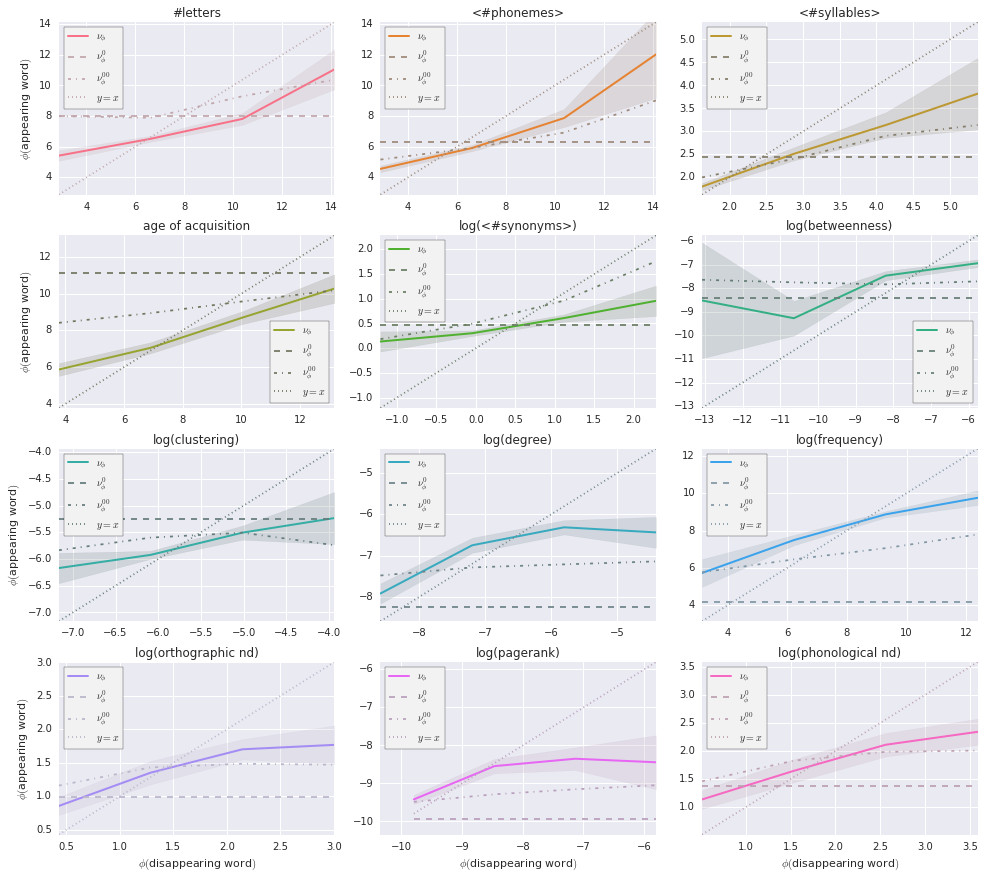

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

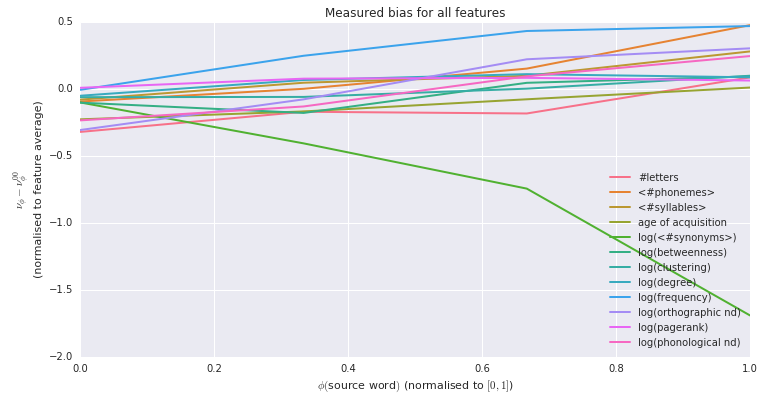

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | *   |


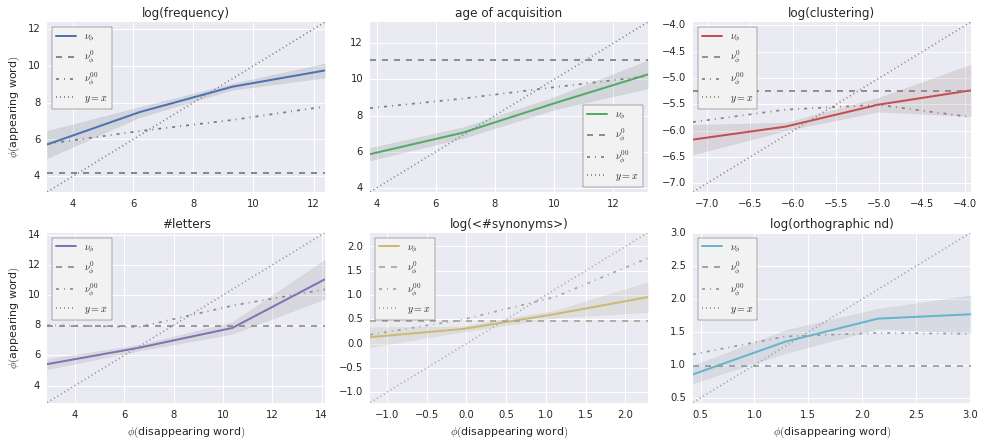

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

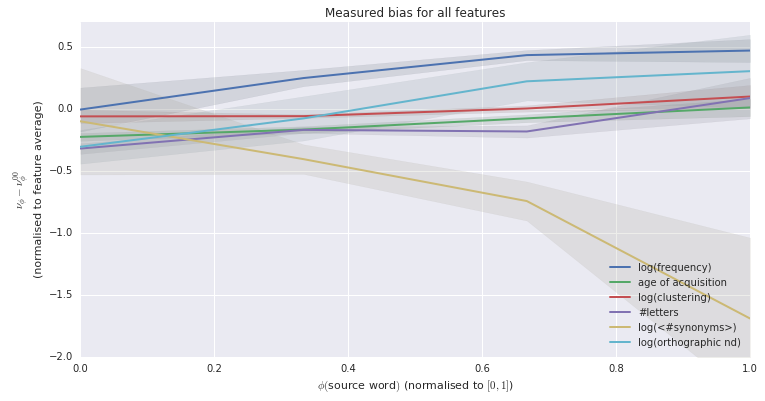

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |


H_00 | *** | *   | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *   | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | **  | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | ns. | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | *** | ns. | ns. | **  |


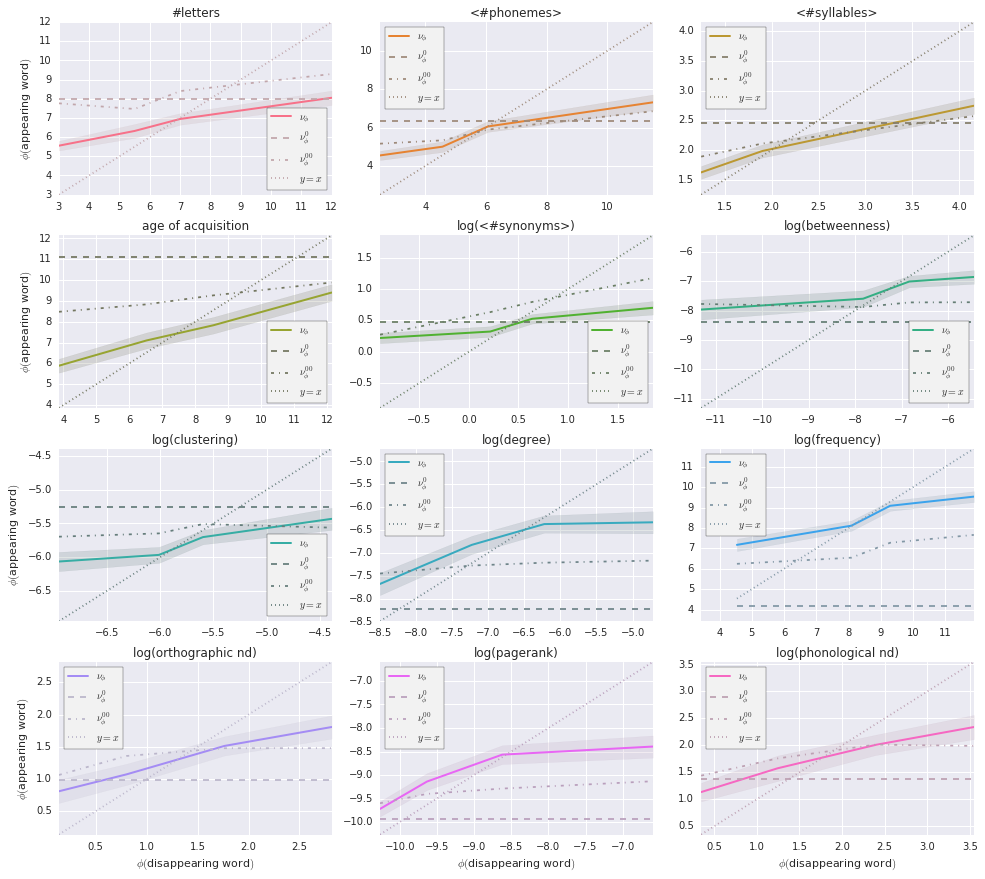

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

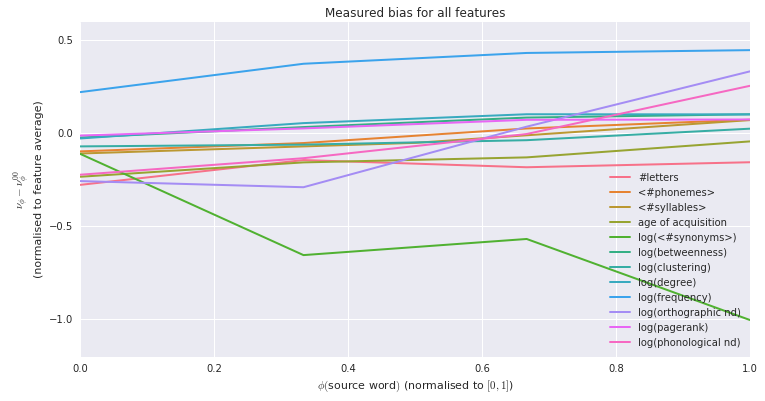

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | **  | *** | ns. | *** |


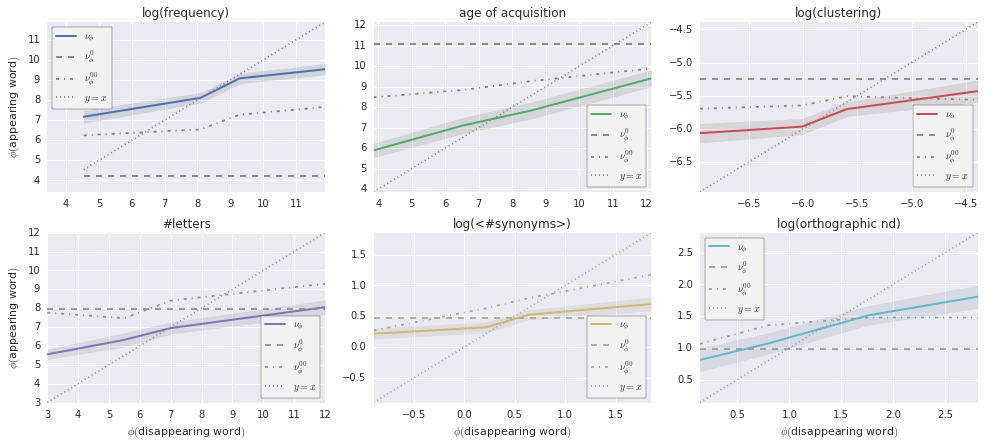

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

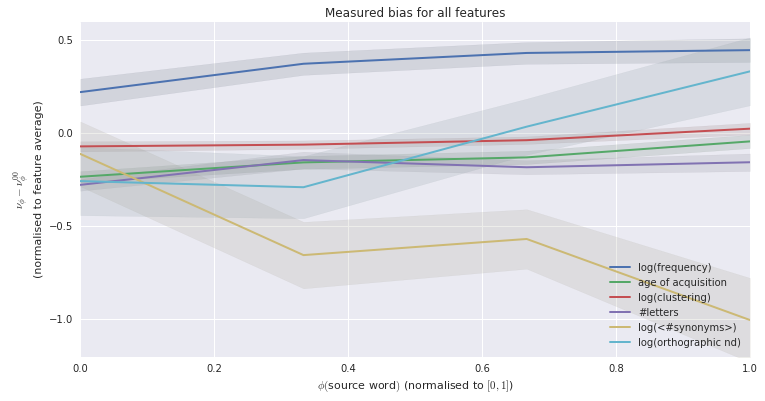

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |


H_00 | **  | ns. | ns. | *** |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | *** |
H_00 | ns. | *** | ns. | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *   | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | **  | *** | *   | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | **  | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *   |
H_00 | **  | **  | ns. | ns. |


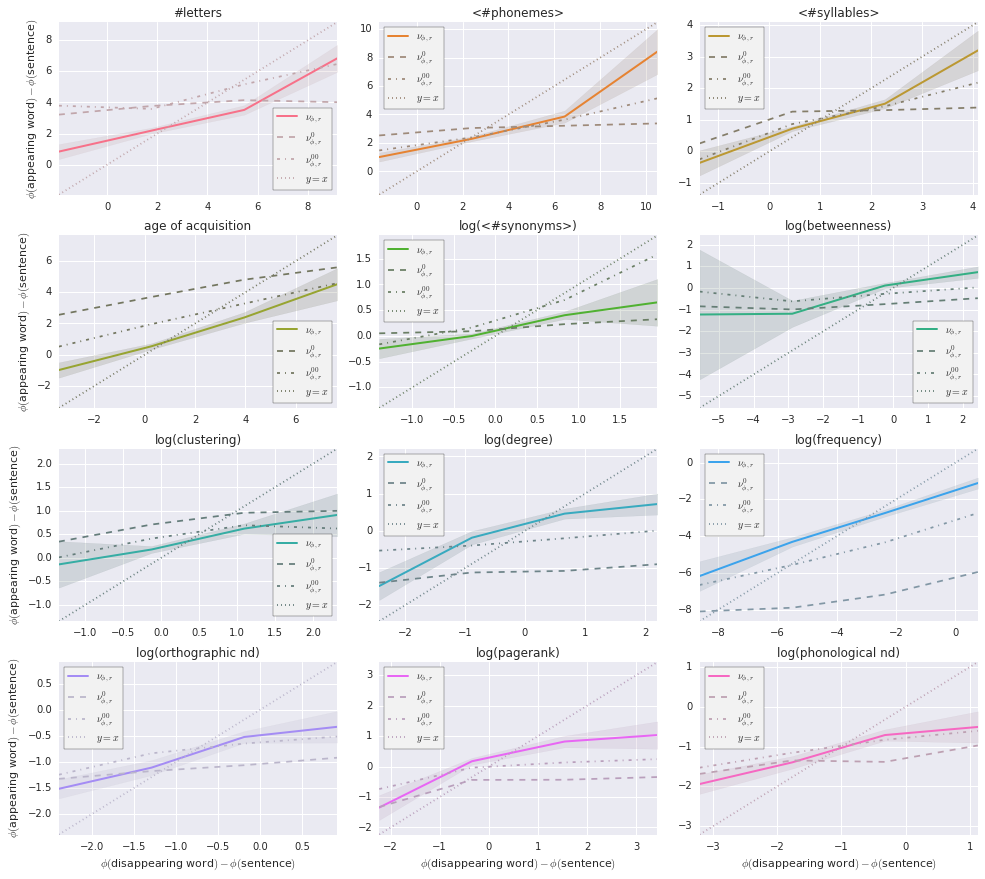

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

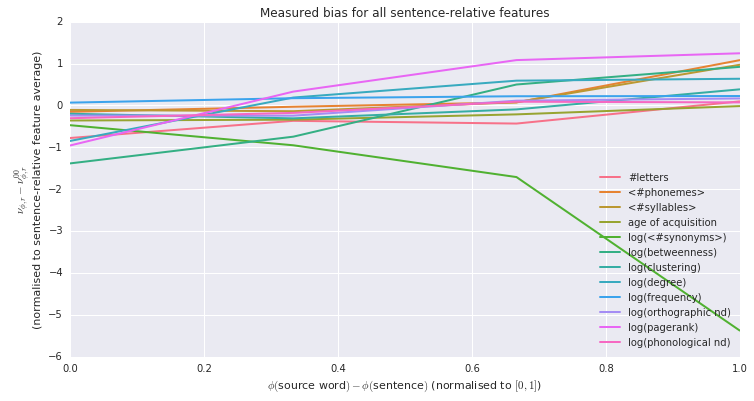

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | **  | *** | *   | ns. |


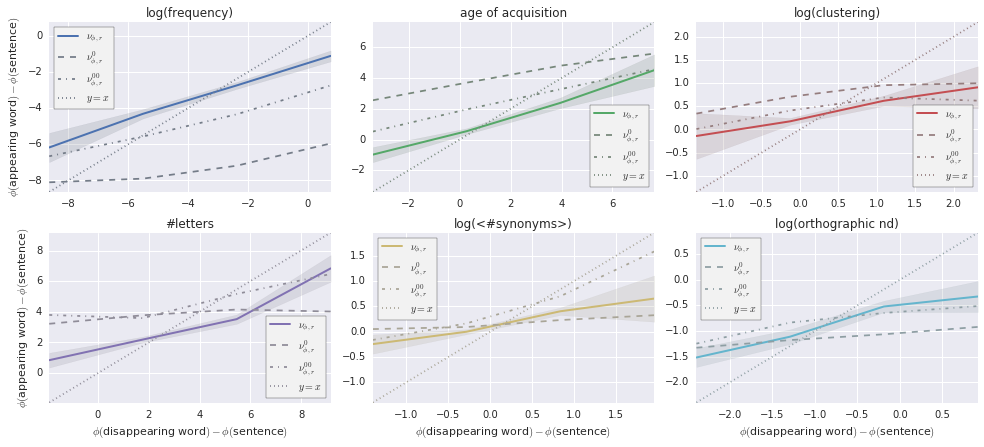

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

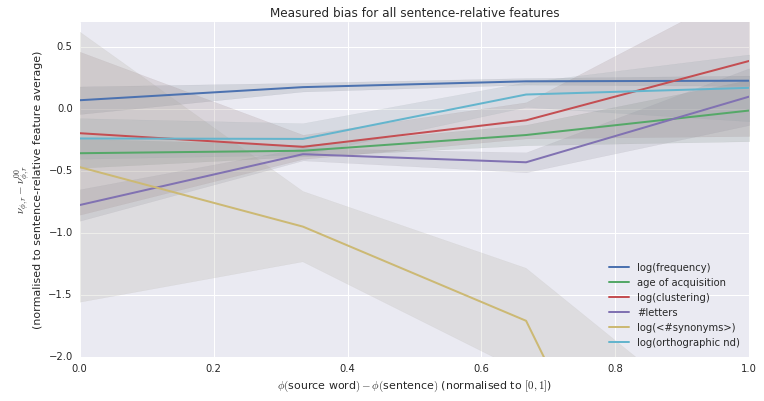

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | **  | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | ns. | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |


H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | **  | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | **  | ns. | *   |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | *   | ns. | *   |


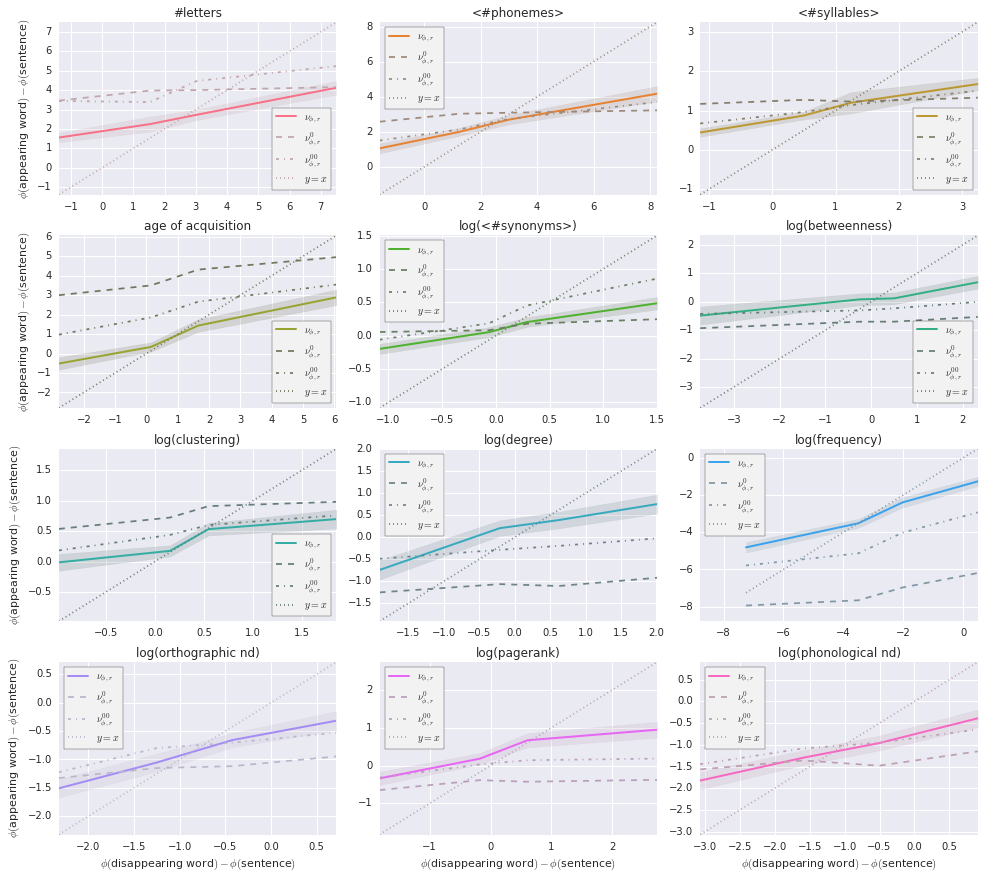

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

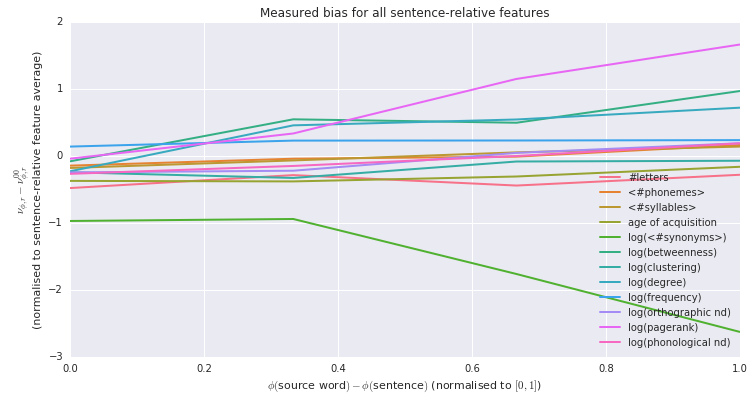

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | ns. | *** | *** |
H_00 | *** | **  | ns. | *   |


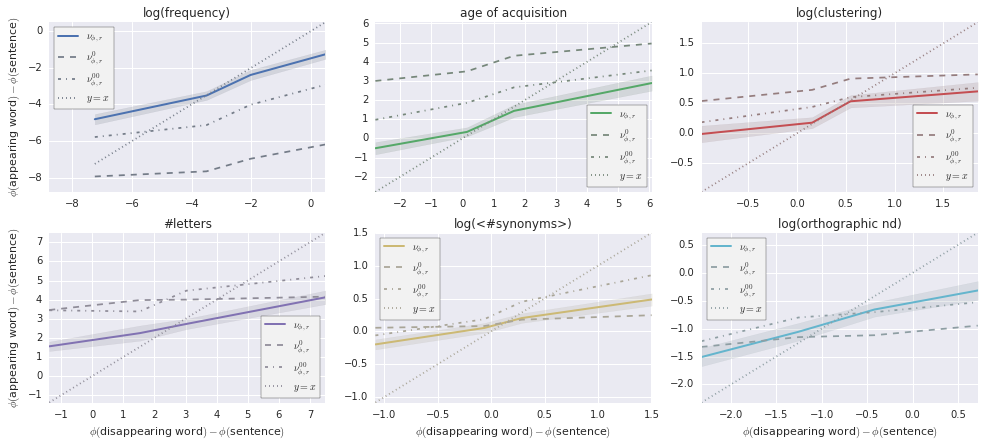

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

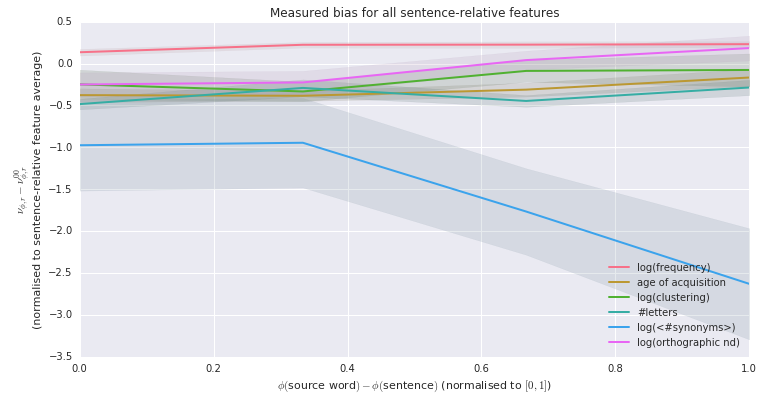

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


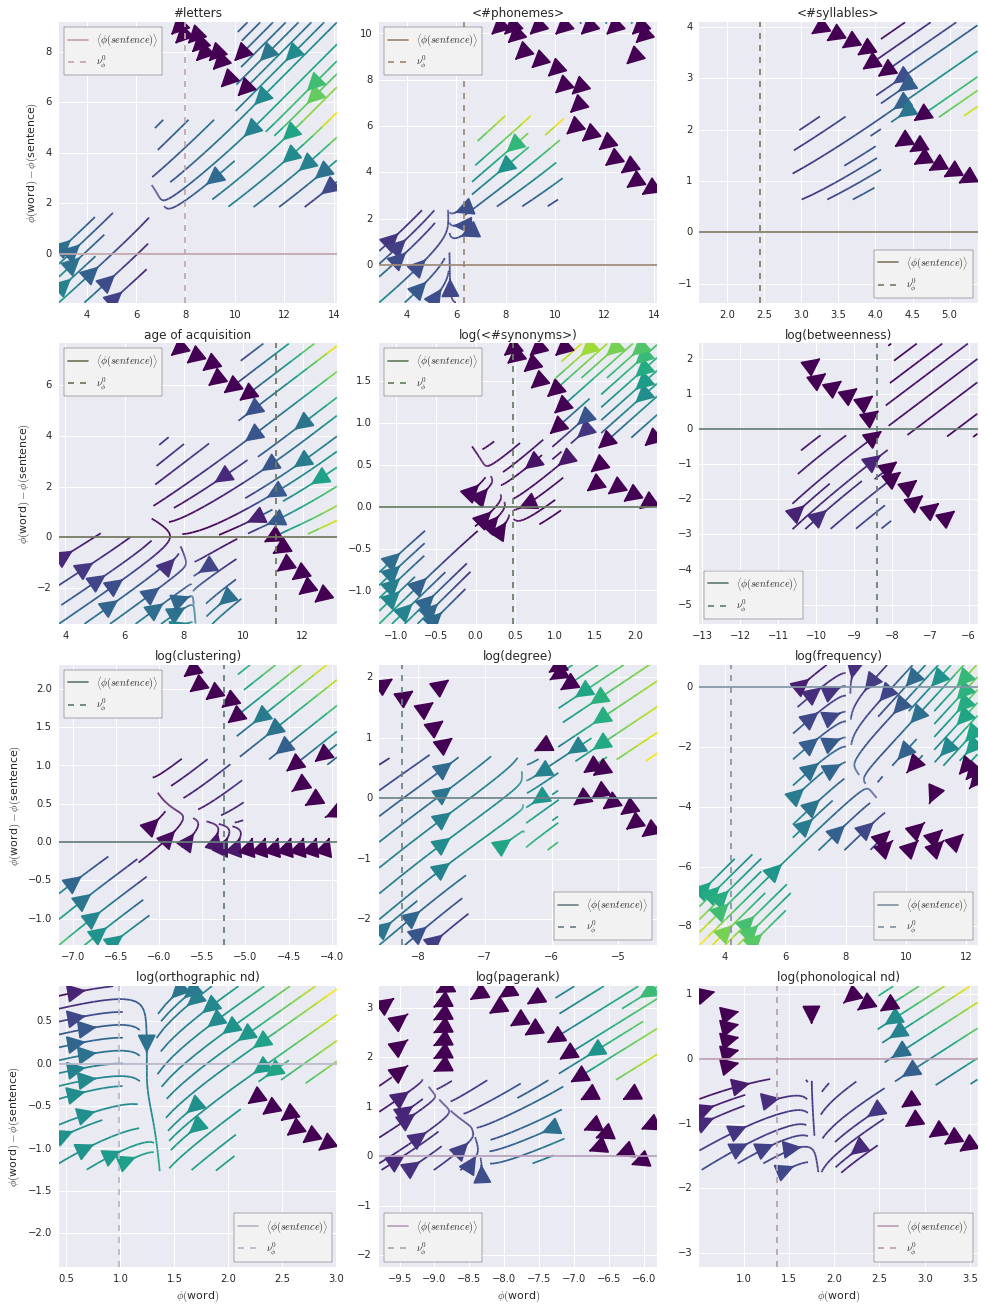

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


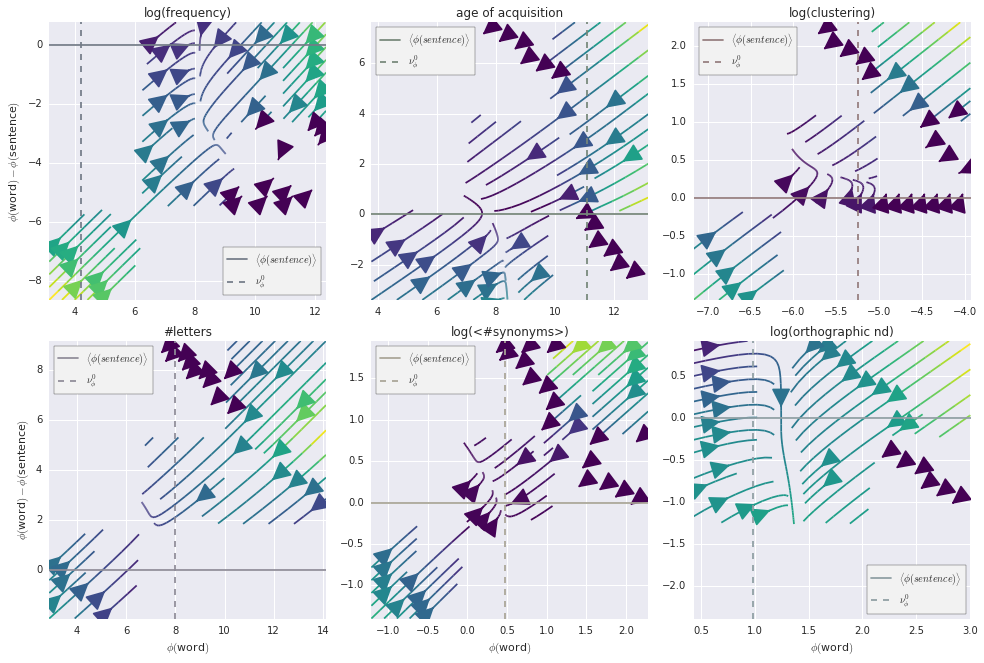

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.52965151  0.1847743   0.0775079   0.07113102  0.03371227  0.02999846
  0.01926641  0.01805821  0.01509079  0.0096798   0.00655659]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.528445,-0.271420,0.083731,-0.222847,-0.242064,0.419672,-0.218663,-0.262450,0.375893,-0.276713,0.145347,-0.001198
Component-1,0.342208,-0.365379,0.109383,-0.289321,-0.229756,-0.424334,0.194591,-0.292117,-0.444309,0.266082,-0.169381,0.027833
Component-2,0.348832,0.625277,-0.043001,0.171100,-0.631099,-0.106504,-0.000281,0.197628,-0.033353,0.033945,-0.050172,-0.052467


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 7358) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  17 of 7358) |                       | Elapsed Time: 0:00:40 ETA: 4:50:46

  0% (  42 of 7358) |                       | Elapsed Time: 0:00:40 ETA: 1:57:53

  0% (  67 of 7358) |                       | Elapsed Time: 0:00:40 ETA: 1:14:02

  1% ( 103 of 7358) |                       | Elapsed Time: 0:00:41 ETA: 0:48:15

  1% ( 131 of 7358) |                       | Elapsed Time: 0:00:41 ETA: 0:01:00

  2% ( 157 of 7358) |                       | Elapsed Time: 0:00:41 ETA: 0:00:57

  2% ( 184 of 7358) |                       | Elapsed Time: 0:00:41 ETA: 0:00:58

  2% ( 210 of 7358) |                       | Elapsed Time: 0:00:41 ETA: 0:00:58

  3% ( 236 of 7358) |                       | Elapsed Time: 0:00:42 ETA: 0:00:57

  3% ( 262 of 7358) |                       | Elapsed Time: 0:00:42 ETA: 0:00:58

  3% ( 288 of 7358) |                       | Elapsed Time: 0:00:42 ETA: 0:00:57

  4% ( 312 of 7358) |                       | Elapsed Time: 0:00:42 ETA: 0:00:58

  4% ( 336 of 7358) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:58

  5% ( 368 of 7358) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:59

  5% ( 392 of 7358) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:59

  5% ( 416 of 7358) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:59

  5% ( 440 of 7358) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:59

  6% ( 460 of 7358) |#                      | Elapsed Time: 0:00:44 ETA: 0:01:01

  6% ( 487 of 7358) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:59

  7% ( 516 of 7358) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:57

  7% ( 552 of 7358) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:54

  7% ( 575 of 7358) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:56

  8% ( 598 of 7358) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:54

  8% ( 619 of 7358) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:58

  8% ( 644 of 7358) |##                     | Elapsed Time: 0:00:45 ETA: 0:01:03

  9% ( 665 of 7358) |##                     | Elapsed Time: 0:00:45 ETA: 0:01:03

  9% ( 682 of 7358) |##                     | Elapsed Time: 0:00:46 ETA: 0:01:09

  9% ( 709 of 7358) |##                     | Elapsed Time: 0:00:46 ETA: 0:01:05

 10% ( 752 of 7358) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:57

 10% ( 784 of 7358) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:52

 11% ( 810 of 7358) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:47

 11% ( 828 of 7358) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:50

 11% ( 847 of 7358) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:55

 11% ( 867 of 7358) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:03

 12% ( 888 of 7358) |##                     | Elapsed Time: 0:00:47 ETA: 0:01:08

 12% ( 920 of 7358) |##                     | Elapsed Time: 0:00:48 ETA: 0:01:03

 12% ( 950 of 7358) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:55

 13% ( 976 of 7358) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:51

 13% ( 996 of 7358) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:51

 13% (1027 of 7358) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:48

 14% (1055 of 7358) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:49

 14% (1082 of 7358) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:49

 15% (1117 of 7358) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:47

 15% (1147 of 7358) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:46

 15% (1173 of 7358) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:47

 16% (1210 of 7358) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:48

 16% (1238 of 7358) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:46

 17% (1264 of 7358) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:47

 17% (1301 of 7358) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:47

 18% (1327 of 7358) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:46

 18% (1353 of 7358) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:47

 18% (1380 of 7358) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:47

 19% (1406 of 7358) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:46

 19% (1437 of 7358) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:45

 19% (1457 of 7358) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:47

 20% (1481 of 7358) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:50

 20% (1507 of 7358) |####                   | Elapsed Time: 0:00:52 ETA: 0:00:51

 20% (1533 of 7358) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:52

 21% (1564 of 7358) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:53

 21% (1590 of 7358) |####                   | Elapsed Time: 0:00:53 ETA: 0:00:50

 21% (1614 of 7358) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:48

 22% (1628 of 7358) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:52

 22% (1656 of 7358) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:51

 22% (1685 of 7358) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:50

 23% (1713 of 7358) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:48

 23% (1748 of 7358) |#####                  | Elapsed Time: 0:00:54 ETA: 0:00:43

 24% (1774 of 7358) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:41

 24% (1800 of 7358) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:42

 25% (1840 of 7358) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:40

 25% (1868 of 7358) |#####                  | Elapsed Time: 0:00:55 ETA: 0:00:40

 25% (1893 of 7358) |#####                  | Elapsed Time: 0:00:56 ETA: 0:00:45

 26% (1932 of 7358) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:44

 26% (1960 of 7358) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:46

 27% (1991 of 7358) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:44

 27% (2024 of 7358) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:39

 27% (2057 of 7358) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:35

 28% (2090 of 7358) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:34

 28% (2116 of 7358) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:35

 29% (2141 of 7358) |######                 | Elapsed Time: 0:00:57 ETA: 0:00:36

 29% (2166 of 7358) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:38

 29% (2180 of 7358) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:46

 30% (2222 of 7358) |######                 | Elapsed Time: 0:00:58 ETA: 0:00:45

 30% (2250 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:00:43

 30% (2279 of 7358) |#######                | Elapsed Time: 0:00:58 ETA: 0:00:42

 31% (2313 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:39

 31% (2334 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:38

 32% (2355 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:41

 32% (2380 of 7358) |#######                | Elapsed Time: 0:00:59 ETA: 0:00:42

 32% (2404 of 7358) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:42

 32% (2422 of 7358) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:47

 33% (2465 of 7358) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:41

 33% (2495 of 7358) |#######                | Elapsed Time: 0:01:00 ETA: 0:00:41

 34% (2517 of 7358) |#######                | Elapsed Time: 0:01:01 ETA: 0:00:42

 34% (2542 of 7358) |#######                | Elapsed Time: 0:01:01 ETA: 0:00:39

 34% (2561 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:02:02

 35% (2589 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:02:05

 35% (2615 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:02:03

 35% (2639 of 7358) |########               | Elapsed Time: 0:01:03 ETA: 0:02:02

 36% (2668 of 7358) |########               | Elapsed Time: 0:01:04 ETA: 0:00:41

 36% (2692 of 7358) |########               | Elapsed Time: 0:01:04 ETA: 0:00:41

 36% (2719 of 7358) |########               | Elapsed Time: 0:01:04 ETA: 0:00:40

 37% (2746 of 7358) |########               | Elapsed Time: 0:01:04 ETA: 0:00:40

 37% (2770 of 7358) |########               | Elapsed Time: 0:01:05 ETA: 0:00:40

 38% (2797 of 7358) |########               | Elapsed Time: 0:01:05 ETA: 0:00:38

 38% (2825 of 7358) |########               | Elapsed Time: 0:01:05 ETA: 0:00:36

 38% (2866 of 7358) |########               | Elapsed Time: 0:01:05 ETA: 0:00:36

 39% (2892 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:35

 39% (2917 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:34

 40% (2956 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:33

 40% (2971 of 7358) |#########              | Elapsed Time: 0:01:06 ETA: 0:00:37

 40% (2983 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:43

 40% (2995 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:49

 40% (3011 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:55

 41% (3036 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:01:00

 41% (3063 of 7358) |#########              | Elapsed Time: 0:01:07 ETA: 0:00:49

 41% (3085 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:44

 42% (3112 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:38

 42% (3128 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:39

 42% (3141 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:43

 43% (3168 of 7358) |#########              | Elapsed Time: 0:01:08 ETA: 0:00:42

 43% (3194 of 7358) |#########              | Elapsed Time: 0:01:09 ETA: 0:00:39

 43% (3235 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:36

 44% (3263 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:32

 44% (3286 of 7358) |##########             | Elapsed Time: 0:01:09 ETA: 0:00:30

 45% (3325 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:30

 45% (3345 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:32

 45% (3370 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:33

 46% (3389 of 7358) |##########             | Elapsed Time: 0:01:10 ETA: 0:00:35

 46% (3416 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:36

 46% (3438 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:37

 47% (3463 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:38

 47% (3496 of 7358) |##########             | Elapsed Time: 0:01:11 ETA: 0:00:36

 47% (3525 of 7358) |###########            | Elapsed Time: 0:01:11 ETA: 0:00:33

 48% (3547 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:33

 48% (3562 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:36

 48% (3574 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:40

 48% (3602 of 7358) |###########            | Elapsed Time: 0:01:12 ETA: 0:00:40

 49% (3629 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:41

 49% (3655 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:36

 50% (3694 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:30

 50% (3719 of 7358) |###########            | Elapsed Time: 0:01:13 ETA: 0:00:28

 50% (3747 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:28

 51% (3771 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:28

 51% (3792 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:29

 51% (3820 of 7358) |###########            | Elapsed Time: 0:01:14 ETA: 0:00:28

 52% (3845 of 7358) |############           | Elapsed Time: 0:01:14 ETA: 0:00:29

 52% (3873 of 7358) |############           | Elapsed Time: 0:01:15 ETA: 0:00:30

 52% (3895 of 7358) |############           | Elapsed Time: 0:01:15 ETA: 0:00:30

 53% (3915 of 7358) |############           | Elapsed Time: 0:01:15 ETA: 0:00:31

 53% (3943 of 7358) |############           | Elapsed Time: 0:01:15 ETA: 0:00:32

 53% (3971 of 7358) |############           | Elapsed Time: 0:01:15 ETA: 0:00:29

 54% (4003 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:26

 54% (4029 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:25

 55% (4058 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:25

 55% (4085 of 7358) |############           | Elapsed Time: 0:01:16 ETA: 0:00:24

 55% (4118 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:24

 56% (4139 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:25

 56% (4151 of 7358) |############           | Elapsed Time: 0:01:17 ETA: 0:00:30

 56% (4166 of 7358) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:31

 56% (4185 of 7358) |#############          | Elapsed Time: 0:01:17 ETA: 0:00:37

 57% (4205 of 7358) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:43

 57% (4245 of 7358) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:31

 58% (4276 of 7358) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:26

 58% (4304 of 7358) |#############          | Elapsed Time: 0:01:18 ETA: 0:00:24

 58% (4335 of 7358) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:22

 59% (4358 of 7358) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:23

 59% (4386 of 7358) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:24

 60% (4415 of 7358) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:24

 60% (4447 of 7358) |#############          | Elapsed Time: 0:01:19 ETA: 0:00:22

 60% (4475 of 7358) |#############          | Elapsed Time: 0:01:20 ETA: 0:00:20

 61% (4495 of 7358) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:21

 61% (4521 of 7358) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:23

 61% (4555 of 7358) |##############         | Elapsed Time: 0:01:20 ETA: 0:00:22

 62% (4583 of 7358) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:21

 62% (4612 of 7358) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:21

 62% (4629 of 7358) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:22

 63% (4655 of 7358) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:22

 63% (4691 of 7358) |##############         | Elapsed Time: 0:01:21 ETA: 0:00:22

 64% (4715 of 7358) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:23

 64% (4740 of 7358) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:22

 64% (4762 of 7358) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:21

 65% (4783 of 7358) |##############         | Elapsed Time: 0:01:22 ETA: 0:00:23

 65% (4811 of 7358) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:23

 65% (4837 of 7358) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:22

 66% (4861 of 7358) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:21

 66% (4886 of 7358) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:21

 66% (4917 of 7358) |###############        | Elapsed Time: 0:01:23 ETA: 0:00:18

 67% (4943 of 7358) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:19

 67% (4980 of 7358) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:18

 67% (5003 of 7358) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:18

 68% (5029 of 7358) |###############        | Elapsed Time: 0:01:24 ETA: 0:00:17

 68% (5077 of 7358) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:16

 69% (5106 of 7358) |###############        | Elapsed Time: 0:01:25 ETA: 0:00:16

 69% (5132 of 7358) |################       | Elapsed Time: 0:01:25 ETA: 0:00:16

 70% (5166 of 7358) |################       | Elapsed Time: 0:01:25 ETA: 0:00:15

 70% (5198 of 7358) |################       | Elapsed Time: 0:01:25 ETA: 0:00:15

 71% (5243 of 7358) |################       | Elapsed Time: 0:01:26 ETA: 0:00:15

 71% (5274 of 7358) |################       | Elapsed Time: 0:01:26 ETA: 0:00:14

 72% (5303 of 7358) |################       | Elapsed Time: 0:01:26 ETA: 0:00:14

 72% (5335 of 7358) |################       | Elapsed Time: 0:01:26 ETA: 0:00:14

 72% (5364 of 7358) |################       | Elapsed Time: 0:01:27 ETA: 0:00:14

 73% (5391 of 7358) |################       | Elapsed Time: 0:01:27 ETA: 0:00:14

 73% (5407 of 7358) |################       | Elapsed Time: 0:01:27 ETA: 0:00:16

 74% (5445 of 7358) |#################      | Elapsed Time: 0:01:27 ETA: 0:00:15

 74% (5475 of 7358) |#################      | Elapsed Time: 0:01:28 ETA: 0:00:14

 74% (5508 of 7358) |#################      | Elapsed Time: 0:01:28 ETA: 0:00:13

 75% (5533 of 7358) |#################      | Elapsed Time: 0:01:28 ETA: 0:00:13

 75% (5564 of 7358) |#################      | Elapsed Time: 0:01:28 ETA: 0:00:12

 75% (5583 of 7358) |#################      | Elapsed Time: 0:01:28 ETA: 0:00:13

 76% (5611 of 7358) |#################      | Elapsed Time: 0:01:29 ETA: 0:00:14

 76% (5642 of 7358) |#################      | Elapsed Time: 0:01:29 ETA: 0:00:13

 77% (5675 of 7358) |#################      | Elapsed Time: 0:01:29 ETA: 0:00:12

 77% (5703 of 7358) |#################      | Elapsed Time: 0:01:29 ETA: 0:00:12

 77% (5729 of 7358) |#################      | Elapsed Time: 0:01:29 ETA: 0:00:11

 78% (5754 of 7358) |#################      | Elapsed Time: 0:01:30 ETA: 0:00:12

 78% (5779 of 7358) |##################     | Elapsed Time: 0:01:30 ETA: 0:00:12

 78% (5805 of 7358) |##################     | Elapsed Time: 0:01:30 ETA: 0:00:13

 79% (5835 of 7358) |##################     | Elapsed Time: 0:01:30 ETA: 0:00:12

 79% (5866 of 7358) |##################     | Elapsed Time: 0:01:31 ETA: 0:00:11

 80% (5902 of 7358) |##################     | Elapsed Time: 0:01:31 ETA: 0:00:11

 80% (5929 of 7358) |##################     | Elapsed Time: 0:01:31 ETA: 0:00:10

 81% (5979 of 7358) |##################     | Elapsed Time: 0:01:31 ETA: 0:00:09

 81% (6008 of 7358) |##################     | Elapsed Time: 0:01:31 ETA: 0:00:09

 81% (6030 of 7358) |##################     | Elapsed Time: 0:01:32 ETA: 0:00:09

 82% (6052 of 7358) |##################     | Elapsed Time: 0:01:32 ETA: 0:00:09

 82% (6083 of 7358) |###################    | Elapsed Time: 0:01:32 ETA: 0:00:09

 82% (6094 of 7358) |###################    | Elapsed Time: 0:01:32 ETA: 0:00:12

 83% (6117 of 7358) |###################    | Elapsed Time: 0:01:33 ETA: 0:00:12

 83% (6142 of 7358) |###################    | Elapsed Time: 0:01:33 ETA: 0:00:11

 83% (6178 of 7358) |###################    | Elapsed Time: 0:01:33 ETA: 0:00:11

 84% (6199 of 7358) |###################    | Elapsed Time: 0:01:33 ETA: 0:00:10

 84% (6221 of 7358) |###################    | Elapsed Time: 0:01:33 ETA: 0:00:09

 85% (6255 of 7358) |###################    | Elapsed Time: 0:01:34 ETA: 0:00:09

 85% (6280 of 7358) |###################    | Elapsed Time: 0:01:34 ETA: 0:00:09

 85% (6304 of 7358) |###################    | Elapsed Time: 0:01:34 ETA: 0:00:09

 86% (6332 of 7358) |###################    | Elapsed Time: 0:01:34 ETA: 0:00:08

 86% (6363 of 7358) |###################    | Elapsed Time: 0:01:35 ETA: 0:00:07

 86% (6381 of 7358) |###################    | Elapsed Time: 0:01:35 ETA: 0:00:08

 87% (6413 of 7358) |####################   | Elapsed Time: 0:01:35 ETA: 0:00:07

 87% (6453 of 7358) |####################   | Elapsed Time: 0:01:35 ETA: 0:00:07

 88% (6477 of 7358) |####################   | Elapsed Time: 0:01:36 ETA: 0:00:07

 88% (6501 of 7358) |####################   | Elapsed Time: 0:01:36 ETA: 0:00:06

 88% (6531 of 7358) |####################   | Elapsed Time: 0:01:36 ETA: 0:00:06

 89% (6562 of 7358) |####################   | Elapsed Time: 0:01:36 ETA: 0:00:06

 89% (6586 of 7358) |####################   | Elapsed Time: 0:01:36 ETA: 0:00:06

 90% (6623 of 7358) |####################   | Elapsed Time: 0:01:37 ETA: 0:00:05

 90% (6654 of 7358) |####################   | Elapsed Time: 0:01:37 ETA: 0:00:05

 90% (6680 of 7358) |####################   | Elapsed Time: 0:01:37 ETA: 0:00:05

 91% (6715 of 7358) |####################   | Elapsed Time: 0:01:37 ETA: 0:00:04

 91% (6742 of 7358) |#####################  | Elapsed Time: 0:01:38 ETA: 0:00:04

 91% (6769 of 7358) |#####################  | Elapsed Time: 0:01:38 ETA: 0:00:04

 92% (6807 of 7358) |#####################  | Elapsed Time: 0:01:38 ETA: 0:00:04

 92% (6832 of 7358) |#####################  | Elapsed Time: 0:01:38 ETA: 0:00:04

 93% (6855 of 7358) |#####################  | Elapsed Time: 0:01:38 ETA: 0:00:04

 93% (6899 of 7358) |#####################  | Elapsed Time: 0:01:39 ETA: 0:00:03

 94% (6929 of 7358) |#####################  | Elapsed Time: 0:01:39 ETA: 0:00:03

 94% (6963 of 7358) |#####################  | Elapsed Time: 0:01:39 ETA: 0:00:02

 95% (7006 of 7358) |#####################  | Elapsed Time: 0:01:39 ETA: 0:00:02

 95% (7031 of 7358) |#####################  | Elapsed Time: 0:01:40 ETA: 0:00:02

 95% (7060 of 7358) |###################### | Elapsed Time: 0:01:40 ETA: 0:00:02

 96% (7083 of 7358) |###################### | Elapsed Time: 0:01:40 ETA: 0:00:01

 96% (7102 of 7358) |###################### | Elapsed Time: 0:01:40 ETA: 0:00:02

 96% (7132 of 7358) |###################### | Elapsed Time: 0:01:40 ETA: 0:00:01

 97% (7175 of 7358) |###################### | Elapsed Time: 0:01:41 ETA: 0:00:01

 97% (7203 of 7358) |###################### | Elapsed Time: 0:01:41 ETA: 0:00:01

 98% (7229 of 7358) |###################### | Elapsed Time: 0:01:41 ETA: 0:00:00

 98% (7267 of 7358) |###################### | Elapsed Time: 0:01:41 ETA: 0:00:00

 99% (7299 of 7358) |###################### | Elapsed Time: 0:01:42 ETA: 0:00:00

 99% (7333 of 7358) |###################### | Elapsed Time: 0:01:42 ETA: 0:00:00

100% (7358 of 7358) |######################| Elapsed Time: 0:01:42 Time: 0:01:42


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | **  | ns. | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | *** | ns. |


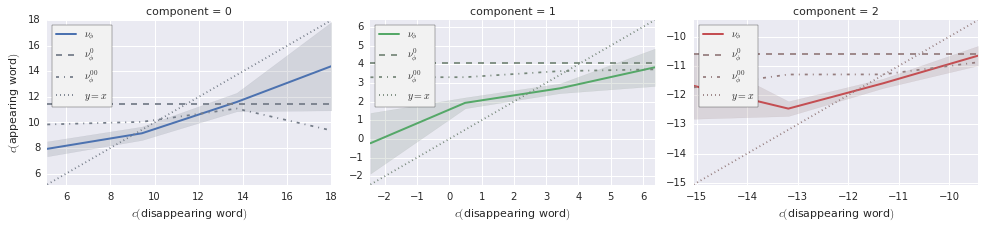

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.66337507  0.2085776 ]



,aoa,frequency,letters_count
Component-0,0.755290,-0.385516,0.530014
Component-1,-0.335417,0.467393,0.817948


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 7358) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  15 of 7358) |                       | Elapsed Time: 0:00:03 ETA: 0:24:54

  0% (  44 of 7358) |                       | Elapsed Time: 0:00:03 ETA: 0:09:02

  1% (  75 of 7358) |                       | Elapsed Time: 0:00:03 ETA: 0:05:36

  1% ( 107 of 7358) |                       | Elapsed Time: 0:00:03 ETA: 0:04:09

  1% ( 139 of 7358) |                       | Elapsed Time: 0:00:03 ETA: 0:00:48

  2% ( 184 of 7358) |                       | Elapsed Time: 0:00:04 ETA: 0:00:47

  3% ( 233 of 7358) |                       | Elapsed Time: 0:00:04 ETA: 0:00:45

  3% ( 276 of 7358) |                       | Elapsed Time: 0:00:04 ETA: 0:00:44

  4% ( 308 of 7358) |                       | Elapsed Time: 0:00:04 ETA: 0:00:44

  4% ( 340 of 7358) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:44

  5% ( 383 of 7358) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:45

  5% ( 413 of 7358) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:45

  6% ( 443 of 7358) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:46

  6% ( 476 of 7358) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:46

  6% ( 508 of 7358) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:46

  7% ( 552 of 7358) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:45

  7% ( 582 of 7358) |#                      | Elapsed Time: 0:00:06 ETA: 0:00:45

  8% ( 612 of 7358) |#                      | Elapsed Time: 0:00:07 ETA: 0:00:45

  8% ( 644 of 7358) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:46

  9% ( 670 of 7358) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:47

  9% ( 701 of 7358) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:47

 10% ( 736 of 7358) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:46

 10% ( 774 of 7358) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:42

 10% ( 808 of 7358) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:41

 11% ( 842 of 7358) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:40

 11% ( 870 of 7358) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:41

 12% ( 903 of 7358) |##                     | Elapsed Time: 0:00:08 ETA: 0:00:42

 12% ( 937 of 7358) |##                     | Elapsed Time: 0:00:09 ETA: 0:00:43

 13% ( 973 of 7358) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:41

 13% (1012 of 7358) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:40

 14% (1049 of 7358) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:37

 14% (1085 of 7358) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:37

 15% (1121 of 7358) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:37

 15% (1156 of 7358) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:35

 16% (1196 of 7358) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:36

 16% (1233 of 7358) |###                    | Elapsed Time: 0:00:10 ETA: 0:00:36

 17% (1267 of 7358) |###                    | Elapsed Time: 0:00:11 ETA: 0:00:36

 17% (1306 of 7358) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:35

 18% (1340 of 7358) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:35

 18% (1380 of 7358) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:35

 19% (1415 of 7358) |####                   | Elapsed Time: 0:00:11 ETA: 0:00:35

 19% (1449 of 7358) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:35

 20% (1488 of 7358) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:36

 20% (1523 of 7358) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:36

 21% (1564 of 7358) |####                   | Elapsed Time: 0:00:12 ETA: 0:00:36

 21% (1599 of 7358) |####                   | Elapsed Time: 0:00:13 ETA: 0:00:36

 22% (1626 of 7358) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:36

 22% (1674 of 7358) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:36

 23% (1709 of 7358) |#####                  | Elapsed Time: 0:00:13 ETA: 0:00:35

 23% (1748 of 7358) |#####                  | Elapsed Time: 0:00:14 ETA: 0:00:34

 24% (1781 of 7358) |#####                  | Elapsed Time: 0:00:14 ETA: 0:00:34

 24% (1819 of 7358) |#####                  | Elapsed Time: 0:00:14 ETA: 0:00:31

 25% (1858 of 7358) |#####                  | Elapsed Time: 0:00:14 ETA: 0:00:31

 25% (1887 of 7358) |#####                  | Elapsed Time: 0:00:14 ETA: 0:00:32

 26% (1932 of 7358) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:33

 26% (1966 of 7358) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:32

 27% (2002 of 7358) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:33

 27% (2042 of 7358) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:32

 28% (2078 of 7358) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:30

 28% (2116 of 7358) |######                 | Elapsed Time: 0:00:16 ETA: 0:00:30

 29% (2149 of 7358) |######                 | Elapsed Time: 0:00:16 ETA: 0:00:30

 29% (2177 of 7358) |######                 | Elapsed Time: 0:00:16 ETA: 0:00:32

 30% (2225 of 7358) |######                 | Elapsed Time: 0:00:16 ETA: 0:00:32

 30% (2261 of 7358) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:32

 31% (2300 of 7358) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:31

 31% (2333 of 7358) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:31

 32% (2364 of 7358) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:30

 32% (2408 of 7358) |#######                | Elapsed Time: 0:00:18 ETA: 0:00:30

 33% (2437 of 7358) |#######                | Elapsed Time: 0:00:18 ETA: 0:00:31

 33% (2484 of 7358) |#######                | Elapsed Time: 0:00:18 ETA: 0:00:31

 34% (2514 of 7358) |#######                | Elapsed Time: 0:00:18 ETA: 0:00:30

 34% (2547 of 7358) |#######                | Elapsed Time: 0:00:18 ETA: 0:00:30

 35% (2593 of 7358) |########               | Elapsed Time: 0:00:19 ETA: 0:00:29

 35% (2627 of 7358) |########               | Elapsed Time: 0:00:19 ETA: 0:00:29

 36% (2668 of 7358) |########               | Elapsed Time: 0:00:19 ETA: 0:00:29

 36% (2701 of 7358) |########               | Elapsed Time: 0:00:19 ETA: 0:00:28

 37% (2737 of 7358) |########               | Elapsed Time: 0:00:20 ETA: 0:00:28

 37% (2775 of 7358) |########               | Elapsed Time: 0:00:20 ETA: 0:00:29

 38% (2810 of 7358) |########               | Elapsed Time: 0:00:20 ETA: 0:00:28

 38% (2852 of 7358) |########               | Elapsed Time: 0:00:20 ETA: 0:00:27

 39% (2903 of 7358) |#########              | Elapsed Time: 0:00:21 ETA: 0:00:27

 40% (2944 of 7358) |#########              | Elapsed Time: 0:00:21 ETA: 0:00:25

 40% (2971 of 7358) |#########              | Elapsed Time: 0:00:21 ETA: 0:00:27

 40% (2993 of 7358) |#########              | Elapsed Time: 0:00:21 ETA: 0:00:29

 41% (3017 of 7358) |#########              | Elapsed Time: 0:00:21 ETA: 0:00:32

 41% (3052 of 7358) |#########              | Elapsed Time: 0:00:22 ETA: 0:00:33

 41% (3084 of 7358) |#########              | Elapsed Time: 0:00:22 ETA: 0:00:33

 42% (3128 of 7358) |#########              | Elapsed Time: 0:00:22 ETA: 0:00:30

 42% (3154 of 7358) |#########              | Elapsed Time: 0:00:22 ETA: 0:00:29

 43% (3188 of 7358) |#########              | Elapsed Time: 0:00:23 ETA: 0:00:28

 44% (3239 of 7358) |##########             | Elapsed Time: 0:00:23 ETA: 0:00:26

 44% (3273 of 7358) |##########             | Elapsed Time: 0:00:23 ETA: 0:00:25

 45% (3312 of 7358) |##########             | Elapsed Time: 0:00:23 ETA: 0:00:24

 45% (3342 of 7358) |##########             | Elapsed Time: 0:00:24 ETA: 0:00:24

 45% (3374 of 7358) |##########             | Elapsed Time: 0:00:24 ETA: 0:00:24

 46% (3404 of 7358) |##########             | Elapsed Time: 0:00:24 ETA: 0:00:25

 46% (3436 of 7358) |##########             | Elapsed Time: 0:00:24 ETA: 0:00:25

 47% (3468 of 7358) |##########             | Elapsed Time: 0:00:24 ETA: 0:00:25

 47% (3513 of 7358) |##########             | Elapsed Time: 0:00:25 ETA: 0:00:25

 48% (3545 of 7358) |###########            | Elapsed Time: 0:00:25 ETA: 0:00:24

 48% (3567 of 7358) |###########            | Elapsed Time: 0:00:25 ETA: 0:00:26

 48% (3605 of 7358) |###########            | Elapsed Time: 0:00:25 ETA: 0:00:26

 49% (3637 of 7358) |###########            | Elapsed Time: 0:00:26 ETA: 0:00:25

 50% (3679 of 7358) |###########            | Elapsed Time: 0:00:26 ETA: 0:00:25

 50% (3713 of 7358) |###########            | Elapsed Time: 0:00:26 ETA: 0:00:24

 50% (3748 of 7358) |###########            | Elapsed Time: 0:00:26 ETA: 0:00:21

 51% (3788 of 7358) |###########            | Elapsed Time: 0:00:27 ETA: 0:00:21

 51% (3822 of 7358) |###########            | Elapsed Time: 0:00:27 ETA: 0:00:21

 52% (3863 of 7358) |############           | Elapsed Time: 0:00:27 ETA: 0:00:21

 52% (3894 of 7358) |############           | Elapsed Time: 0:00:27 ETA: 0:00:21

 53% (3927 of 7358) |############           | Elapsed Time: 0:00:27 ETA: 0:00:21

 54% (3974 of 7358) |############           | Elapsed Time: 0:00:28 ETA: 0:00:21

 54% (4010 of 7358) |############           | Elapsed Time: 0:00:28 ETA: 0:00:20

 55% (4047 of 7358) |############           | Elapsed Time: 0:00:28 ETA: 0:00:19

 55% (4079 of 7358) |############           | Elapsed Time: 0:00:28 ETA: 0:00:19

 55% (4116 of 7358) |############           | Elapsed Time: 0:00:29 ETA: 0:00:19

 56% (4149 of 7358) |############           | Elapsed Time: 0:00:29 ETA: 0:00:20

 56% (4175 of 7358) |#############          | Elapsed Time: 0:00:29 ETA: 0:00:21

 57% (4202 of 7358) |#############          | Elapsed Time: 0:00:29 ETA: 0:00:22

 57% (4248 of 7358) |#############          | Elapsed Time: 0:00:29 ETA: 0:00:21

 58% (4287 of 7358) |#############          | Elapsed Time: 0:00:30 ETA: 0:00:21

 58% (4323 of 7358) |#############          | Elapsed Time: 0:00:30 ETA: 0:00:19

 59% (4355 of 7358) |#############          | Elapsed Time: 0:00:30 ETA: 0:00:18

 59% (4392 of 7358) |#############          | Elapsed Time: 0:00:30 ETA: 0:00:17

 60% (4434 of 7358) |#############          | Elapsed Time: 0:00:31 ETA: 0:00:17

 60% (4472 of 7358) |#############          | Elapsed Time: 0:00:31 ETA: 0:00:17

 61% (4507 of 7358) |##############         | Elapsed Time: 0:00:31 ETA: 0:00:16

 61% (4545 of 7358) |##############         | Elapsed Time: 0:00:31 ETA: 0:00:16

 62% (4582 of 7358) |##############         | Elapsed Time: 0:00:31 ETA: 0:00:16

 62% (4617 of 7358) |##############         | Elapsed Time: 0:00:32 ETA: 0:00:16

 63% (4644 of 7358) |##############         | Elapsed Time: 0:00:32 ETA: 0:00:16

 63% (4691 of 7358) |##############         | Elapsed Time: 0:00:32 ETA: 0:00:15

 64% (4725 of 7358) |##############         | Elapsed Time: 0:00:32 ETA: 0:00:15

 64% (4758 of 7358) |##############         | Elapsed Time: 0:00:33 ETA: 0:00:16

 65% (4801 of 7358) |###############        | Elapsed Time: 0:00:33 ETA: 0:00:15

 65% (4838 of 7358) |###############        | Elapsed Time: 0:00:33 ETA: 0:00:15

 66% (4875 of 7358) |###############        | Elapsed Time: 0:00:33 ETA: 0:00:15

 66% (4912 of 7358) |###############        | Elapsed Time: 0:00:33 ETA: 0:00:14

 67% (4948 of 7358) |###############        | Elapsed Time: 0:00:34 ETA: 0:00:14

 67% (4985 of 7358) |###############        | Elapsed Time: 0:00:34 ETA: 0:00:13

 68% (5018 of 7358) |###############        | Elapsed Time: 0:00:34 ETA: 0:00:13

 68% (5059 of 7358) |###############        | Elapsed Time: 0:00:34 ETA: 0:00:13

 69% (5098 of 7358) |###############        | Elapsed Time: 0:00:34 ETA: 0:00:12

 70% (5151 of 7358) |################       | Elapsed Time: 0:00:35 ETA: 0:00:12

 70% (5190 of 7358) |################       | Elapsed Time: 0:00:35 ETA: 0:00:11

 71% (5243 of 7358) |################       | Elapsed Time: 0:00:35 ETA: 0:00:11

 71% (5281 of 7358) |################       | Elapsed Time: 0:00:35 ETA: 0:00:11

 72% (5320 of 7358) |################       | Elapsed Time: 0:00:36 ETA: 0:00:11

 72% (5353 of 7358) |################       | Elapsed Time: 0:00:36 ETA: 0:00:10

 73% (5389 of 7358) |################       | Elapsed Time: 0:00:36 ETA: 0:00:11

 73% (5427 of 7358) |################       | Elapsed Time: 0:00:36 ETA: 0:00:11

 74% (5465 of 7358) |#################      | Elapsed Time: 0:00:37 ETA: 0:00:11

 75% (5519 of 7358) |#################      | Elapsed Time: 0:00:37 ETA: 0:00:10

 75% (5557 of 7358) |#################      | Elapsed Time: 0:00:37 ETA: 0:00:10

 75% (5588 of 7358) |#################      | Elapsed Time: 0:00:37 ETA: 0:00:10

 76% (5631 of 7358) |#################      | Elapsed Time: 0:00:38 ETA: 0:00:09

 77% (5668 of 7358) |#################      | Elapsed Time: 0:00:38 ETA: 0:00:09

 77% (5720 of 7358) |#################      | Elapsed Time: 0:00:38 ETA: 0:00:09

 78% (5754 of 7358) |#################      | Elapsed Time: 0:00:38 ETA: 0:00:09

 78% (5795 of 7358) |##################     | Elapsed Time: 0:00:38 ETA: 0:00:09

 79% (5831 of 7358) |##################     | Elapsed Time: 0:00:39 ETA: 0:00:08

 80% (5887 of 7358) |##################     | Elapsed Time: 0:00:39 ETA: 0:00:08

 80% (5923 of 7358) |##################     | Elapsed Time: 0:00:39 ETA: 0:00:08

 81% (5979 of 7358) |##################     | Elapsed Time: 0:00:39 ETA: 0:00:07

 81% (6014 of 7358) |##################     | Elapsed Time: 0:00:40 ETA: 0:00:07

 82% (6047 of 7358) |##################     | Elapsed Time: 0:00:40 ETA: 0:00:07

 82% (6085 of 7358) |###################    | Elapsed Time: 0:00:40 ETA: 0:00:07

 83% (6111 of 7358) |###################    | Elapsed Time: 0:00:40 ETA: 0:00:07

 83% (6147 of 7358) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:07

 84% (6182 of 7358) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:07

 84% (6212 of 7358) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:07

 85% (6255 of 7358) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:06

 85% (6285 of 7358) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:06

 85% (6324 of 7358) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:06

 86% (6366 of 7358) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:05

 86% (6398 of 7358) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:05

 87% (6439 of 7358) |####################   | Elapsed Time: 0:00:42 ETA: 0:00:05

 87% (6474 of 7358) |####################   | Elapsed Time: 0:00:42 ETA: 0:00:05

 88% (6510 of 7358) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:04

 89% (6552 of 7358) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:04

 89% (6587 of 7358) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:04

 90% (6644 of 7358) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:03

 90% (6680 of 7358) |####################   | Elapsed Time: 0:00:44 ETA: 0:00:03

 91% (6715 of 7358) |####################   | Elapsed Time: 0:00:44 ETA: 0:00:03

 91% (6752 of 7358) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:03

 92% (6807 of 7358) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:03

 92% (6842 of 7358) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:02

 93% (6878 of 7358) |#####################  | Elapsed Time: 0:00:45 ETA: 0:00:02

 94% (6918 of 7358) |#####################  | Elapsed Time: 0:00:45 ETA: 0:00:02

 94% (6959 of 7358) |#####################  | Elapsed Time: 0:00:45 ETA: 0:00:02

 95% (7011 of 7358) |#####################  | Elapsed Time: 0:00:45 ETA: 0:00:01

 95% (7048 of 7358) |###################### | Elapsed Time: 0:00:46 ETA: 0:00:01

 96% (7083 of 7358) |###################### | Elapsed Time: 0:00:46 ETA: 0:00:01

 96% (7118 of 7358) |###################### | Elapsed Time: 0:00:46 ETA: 0:00:01

 97% (7175 of 7358) |###################### | Elapsed Time: 0:00:46 ETA: 0:00:01

 98% (7213 of 7358) |###################### | Elapsed Time: 0:00:47 ETA: 0:00:00

 98% (7248 of 7358) |###################### | Elapsed Time: 0:00:47 ETA: 0:00:00

 99% (7286 of 7358) |###################### | Elapsed Time: 0:00:47 ETA: 0:00:00

 99% (7326 of 7358) |###################### | Elapsed Time: 0:00:47 ETA: 0:00:00

100% (7358 of 7358) |######################| Elapsed Time: 0:00:47 Time: 0:00:47


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |


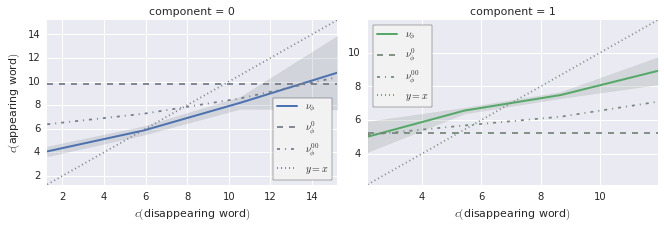

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 881 (cluster-unique) substitutions, but the PCA is in fact computed on 676 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global


    * global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
   ** global -> global
  *** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
    * global -> global
    * global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 503 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.1693552573435606

intercept                      3.840847
global_aoa                     0.127387
global_clustering              0.143919
global_frequency               0.538811
global_letters_count           0.001459
global_orthographic_density    0.101768
global_synonyms_count         -0.074403
dtype: float64

Regressing global frequency with 503 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.19556401294522374

intercept                                              0.828309
global_aoa                                            -0.104438
global_clustering                                      0.829330
global_frequency                                       1.103426
global_letters_count                                   0.567994
global_orthographic_density                            3.043509
global_synon

Regressing rel frequency with 503 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.36056996046299983

intercept                                       -1.072601
rel_aoa                                          0.105109
rel_clustering                                   0.102887
rel_frequency                                    0.750872
rel_letters_count                               -0.127973
rel_orthographic_density                        -0.562293
rel_synonyms_count                               0.162963
rel_aoa * rel_clustering                        -0.066159
rel_aoa * rel_frequency                         -0.039050
rel_aoa * rel_letters_count                     -0.013556
rel_aoa * rel_orthographic_density               0.053355
rel_aoa * rel_synonyms_count                     0.135461
rel_clustering * rel_frequency                  -0.074828
rel_clustering * rel_letters_count               0.035536
rel_clustering * rel_orthographic_density        0.074865
rel_clustering *

Regressing rel aoa with 462 measures, no interactions
           ^^^^^^^
R^2 = 0.05880053073259861

intercept                      0.330176
global_aoa                     0.137538
global_clustering             -0.113925
global_frequency              -0.182012
global_letters_count           0.059270
global_orthographic_density    0.053172
global_synonyms_count         -0.104642
dtype: float64

Regressing rel aoa with 462 measures, with interactions
           ^^^^^^^
R^2 = 0.1093164349304947

intercept                                              2.424067
global_aoa                                             1.377960
global_clustering                                     -0.003734
global_frequency                                      -0.656781
global_letters_count                                  -0.703091
global_orthographic_density                           -2.417698
global_synonyms_count                                 -1.660621
global_aoa * global_clustering                         

Regressing global aoa with 462 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.3703330663900626

intercept                                                 100.232177
global_aoa                                                 -0.161828
global_clustering                                          12.215915
global_frequency                                           -4.332160
global_letters_count                                       -5.770915
global_orthographic_density                               -19.611259
global_synonyms_count                                     -12.097041
rel_aoa                                                     0.058630
rel_clustering                                            -10.359042
rel_frequency                                               5.337029
rel_letters_count                                           4.531699
rel_orthographic_density                                   12.281217
rel_synonyms_count                                         -5.217

Regressing global clustering with 422 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0719060212119641

intercept                  -5.931226
rel_aoa                    -0.015098
rel_clustering              0.262345
rel_frequency              -0.009358
rel_letters_count           0.013118
rel_orthographic_density    0.000139
rel_synonyms_count         -0.092510
dtype: float64

Regressing global clustering with 422 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.12945924643167284

intercept                                       -5.848151
rel_aoa                                         -0.037081
rel_clustering                                   0.088056
rel_frequency                                    0.027019
rel_letters_count                               -0.021272
rel_orthographic_density                         0.039447
rel_synonyms_count                              -0.103529
rel_aoa * rel_clustering                         0.076356
rel_aoa * rel_freque

Regressing rel clustering with 422 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.4142918901415621

intercept                                                 20.673448
global_aoa                                                -0.184795
global_clustering                                          3.773981
global_frequency                                          -1.723619
global_letters_count                                      -0.308644
global_orthographic_density                               -0.172144
global_synonyms_count                                      0.459103
rel_aoa                                                   -0.010908
rel_clustering                                            -3.187592
rel_frequency                                              0.403243
rel_letters_count                                         -0.863365
rel_orthographic_density                                  -2.412514
rel_synonyms_count                                        -2.967608
g

Regressing rel letters_count with 503 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.18509179962933398

intercept                   1.008942
rel_aoa                    -0.123192
rel_clustering             -0.064372
rel_frequency              -0.178754
rel_letters_count           0.386458
rel_orthographic_density   -0.114810
rel_synonyms_count         -0.330510
dtype: float64

Regressing rel letters_count with 503 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.21275987830004262

intercept                                        0.839293
rel_aoa                                         -0.164378
rel_clustering                                   0.287574
rel_frequency                                   -0.220080
rel_letters_count                                0.516735
rel_orthographic_density                        -0.090620
rel_synonyms_count                               0.059736
rel_aoa * rel_clustering                         0.111350
rel_aoa * rel_frequ

Regressing global synonyms_count with 490 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.14100926045240292

intercept                                              2.506985
global_aoa                                            -0.134439
global_clustering                                      0.326600
global_frequency                                      -0.146616
global_letters_count                                  -0.020179
global_orthographic_density                           -0.204084
global_synonyms_count                                  0.838374
global_aoa * global_clustering                        -0.015227
global_aoa * global_frequency                         -0.008869
global_aoa * global_letters_count                      0.009598
global_aoa * global_orthographic_density               0.044725
global_aoa * global_synonyms_count                     0.023393
global_clustering * global_frequency                  -0.032420
global_clustering * global_letters_cou

Regressing global synonyms_count with 490 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.12556160992722953

intercept                      1.322142
global_aoa                    -0.041041
global_clustering              0.163819
global_frequency               0.011600
global_letters_count           0.034955
global_orthographic_density   -0.011156
global_synonyms_count          0.217047
rel_aoa                        0.040357
rel_clustering                -0.123693
rel_frequency                 -0.014973
rel_letters_count             -0.032189
rel_orthographic_density       0.062022
rel_synonyms_count             0.097695
dtype: float64

Regressing global synonyms_count with 490 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2640174699196396

intercept                                                 4.795464
global_aoa                                                0.293472
global_clustering                                         2.141331
global

Regressing rel orthographic_density with 430 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.16590662716826166

intercept                                              3.769474
global_aoa                                            -0.352741
global_clustering                                      0.889244
global_frequency                                       0.052569
global_letters_count                                  -0.428532
global_orthographic_density                            0.041074
global_synonyms_count                                  0.467246
global_aoa * global_clustering                        -0.012901
global_aoa * global_frequency                         -0.005911
global_aoa * global_letters_count                      0.036446
global_aoa * global_orthographic_density               0.094554
global_aoa * global_synonyms_count                    -0.009752
global_clustering * global_frequency                  -0.045991
global_clustering * global_lette

Regressing rel orthographic_density with 430 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.25648184618726366

intercept                      2.334768
global_aoa                     0.024684
global_clustering              0.079498
global_frequency              -0.040434
global_letters_count          -0.198010
global_orthographic_density   -0.560183
global_synonyms_count          0.065281
rel_aoa                       -0.034054
rel_clustering                -0.058050
rel_frequency                  0.073886
rel_letters_count              0.159617
rel_orthographic_density       0.911624
rel_synonyms_count             0.037589
dtype: float64

Regressing rel orthographic_density with 430 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.3710063540470248

intercept                                                -9.222587
global_aoa                                               -0.186246
global_clustering                                        -0.5